<a href="https://colab.research.google.com/github/OmJoshii/ML_Lab/blob/main/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X = X[:, :2]

print("Features shape :", X.shape)
print("Target shape   :", y.shape)

Features shape : (150, 2)
Target shape   : (150,)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)
print("Training set size :", X_train.shape[0])
print("Testing set size  :", X_test.shape[0])


Training set size : 105
Testing set size  : 45


In [ ]:
model_svc = SVC(kernel='linear', random_state=42)
model_svc.fit(X_train, y_train)
print("SVC training complete.")

SVC training complete.


In [ ]:
y_pred_svc = model_svc.predict(X_test)
print("Predicted classes by SVC :", y_pred_svc)

Predicted classes by SVC : [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


In [ ]:

acc_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy :", acc_svc)

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("SVC Confusion Matrix:")
print(conf_matrix_svc)

report_svc = classification_report(y_test, y_pred_svc)
print("SVC Classification Report:")
print(report_svc)

SVC Accuracy : 0.8
SVC Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
print("kNN training complete.")

kNN training complete.


In [ ]:
y_pred_knn = model_knn.predict(X_test)
print("Predicted classes by kNN :", y_pred_knn)

Predicted classes by kNN : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 1 1 1 2 0 1 0 2 2 1 1 2 0 0 0 0 2 0 0 2 2
 0 0 0 1 2 2 0 0]


In [ ]:

acc_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy :", acc_knn)


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("kNN Confusion Matrix:")
print(conf_matrix_knn)

report_knn = classification_report(y_test, y_pred_knn)
print("kNN Classification Report:")
print(report_knn)

kNN Accuracy : 0.7777777777777778
kNN Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  5  8]]
kNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



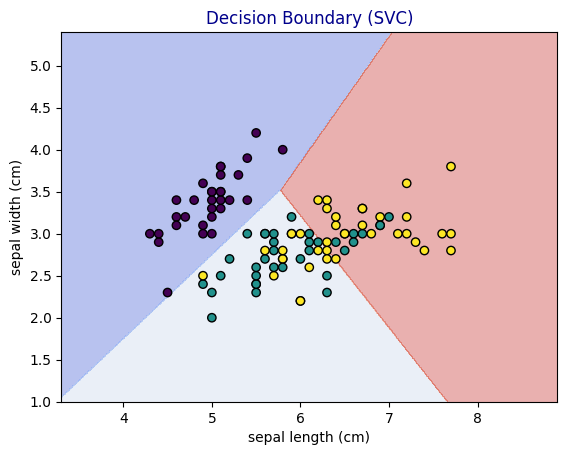

In [ ]:
x_vals, y_vals = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                             np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))

Z_svc = model_svc.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
Z_svc = Z_svc.reshape(x_vals.shape)

plt.contourf(x_vals, y_vals, Z_svc, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k')
plt.title("Decision Boundary (SVC)", color='darkblue')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

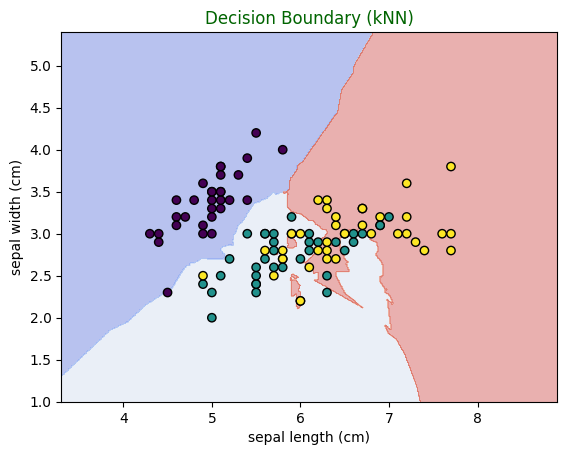

In [ ]:
Z_knn = model_knn.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
Z_knn = Z_knn.reshape(x_vals.shape)

plt.contourf(x_vals, y_vals, Z_knn, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k')
plt.title("Decision Boundary (kNN)", color='darkgreen')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest training complete.")

Random Forest training complete.


In [ ]:
y_pred_rf = model_rf.predict(X_test)
print("Predicted classes by Random Forest :", y_pred_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy :", acc_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(report_rf)

Predicted classes by Random Forest : [1 0 2 1 1 0 1 1 1 2 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 1 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 2 2 2 0 0]
Random Forest Accuracy : 0.7555555555555555
Random Forest Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



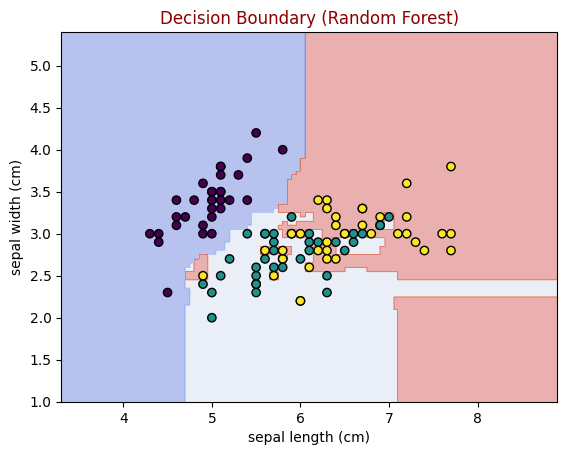

In [ ]:
Z_rf = model_rf.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
Z_rf = Z_rf.reshape(x_vals.shape)

plt.contourf(x_vals, y_vals, Z_rf, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k')
plt.title("Decision Boundary (Random Forest)", color='darkred')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()